In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

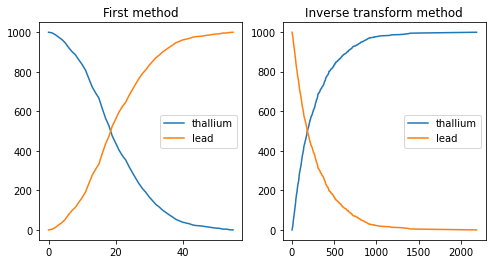

In [6]:
#EX1

t = 0
thallium_count = np.array([1000])
lead_count = np.array([0])
tau = 3.052 * 60

def prob(t,tau):
    return 1 - 2**(-t/tau)

while thallium_count[-1] != 0:
    t = t+1
    curr = 0
    for i in range(thallium_count[-1]):
        if (np.random.random() <= prob(t, tau)):
            curr = curr + 1
    
    thallium_count = np.append(thallium_count, np.max([thallium_count[-1]-curr,0]))
    lead_count = np.append(lead_count, lead_count[-1]+curr)





fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.plot(np.arange(t+1),thallium_count, label = 'thallium')
ax1.plot(np.arange(t+1),lead_count, label = 'lead')
ax1.legend(loc= 'best')
ax1.set_title('First method')


def icdf(x,tau):
    return -tau* np.log2(1-x)

dacay_times = np.sort(icdf(np.random.random(1000), tau))

ax2.plot(dacay_times,np.arange(1000), label = 'thallium')
ax2.plot(dacay_times,np.flip(np.arange(1000)), label = 'lead')
ax2.legend(loc= 'best')
ax2.set_title('Inverse transform method')

fig.show()

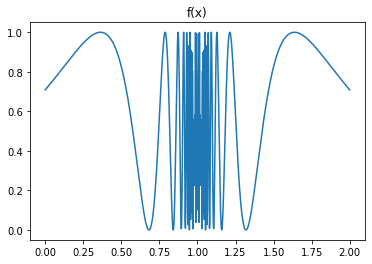

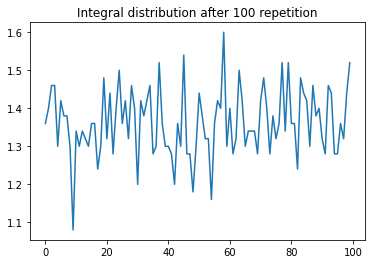

Mean of integral distribution : 1.3622
Std of integral distribution : 0.08794975838511437 

Integral value with the Mean Value Method:  1.3463698247941613
Sigma with the Mean Value Method:  0.06363309140116163


In [7]:
#EX2

def f(x):
    return (np.sin(1 / (1-x))) ** 2

x = np.linspace(0.001,1.999,1000)
plt.figure()
plt.plot(x,f(x))
plt.title('f(x)')
plt.show()


I_list = []
N = 100
for j in range(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): count += 1
        I = 2 * count / N
    I_list.append(I)
    I = 0
mean = np.mean(I_list)
std = np.std(I_list)

plt.figure()
plt.plot(I_list)
plt.title('Integral distribution after 100 repetition')
plt.show()

print('Mean of integral distribution :' , mean)
print('Std of integral distribution :' , std, '\n')


f_list = []
for i in range(N):
    x = 2 * np.random.random()
    f_list.append(f(x))

I_mv = 2/N * np.sum(f_list)
sigma_mv = 2 * np.sqrt(np.var(f_list)) / np.sqrt(N)
print('Integral value with the Mean Value Method: ' , I_mv)
print('Sigma with the Mean Value Method: ', sigma_mv)

In [9]:
#EX3

from random import random
import math

N = 1000000
A = 0
for i in range(N):
    x = random()
    y = random()
    if x**2 + y**2 <= 1:
        A += 1
print('integral value:', math.pi)
print('estimated integral value:', (4*A)/N)

A = 0
x = np.zeros(10)
for i in range(N):
    for j in range(10):
        x[j] = random()
    if np.linalg.norm(x) <= 1:
        A += 1
print('integral value:', math.pi**5/120)
print('estimated integral value:', (2**10 *A)/N)

integral value: 3.141592653589793
estimated integral value: 3.143
integral value: 2.550164039877345
estimated integral value: 2.514944


In [10]:
def I(x):
    return (x**(-0.5)) / (np.exp(x) + 1)

def w(x):
    return 1 / (np.sqrt(x))

a = 0
b = 1
N = 1000
first = True

for i in range(N):
    r = np.random.uniform(a, b)**2
    if first:
        f_x = np.array([I(r)])
        w_x = np.array([w(r)])
        first = False
    else:
        f_x = np.append(f_x, I(r))
        w_x = np.append(w_x, w(r))

I = 2 * sum(f_x / w_x) / N

print("Importance sampling integral:", I)

Importance sampling integral: 0.8379200261036006
